In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
from  matplotlib.ticker import PercentFormatter

# Read CSV
Marvel = pd.read_csv("movie_ratings_v2.csv")
Marvel

,Index,Movie,Year_Release,IMDB_Ratings,Metascore,Votes,Gross,RT,Budget,US_Box_Office_2,Worldwide_Box_Office,lag_IMDB,lag_Metascore,lag_Votes,lag_RT,lag_Budget,lag_US_Box_Office_2,lag_Worldwide_Box_Office
0,1,Iron Man,5/2/2008,7.9,79.0,837642.0,318412101.0,0.93,186000000.0,318604126.0,5.851715e+08,0.0,0,0,0.00,0,0,0
1,2,The Incredible Hulk,6/13/2008,6.9,61.0,389173.0,134520000.0,0.67,137500000.0,134806913.0,2.655739e+08,7.9,79,837642,0.93,186000000,318604126,585171547
2,3,Iron Man 2,5/7/2010,7.0,57.0,637214.0,312430000.0,0.73,170000000.0,312433331.0,6.211564e+08,6.9,61,389173,0.67,137500000,134806913,265573859
3,4,Thor,5/6/2011,7.0,57.0,661506.0,181030000.0,0.77,150000000.0,181030624.0,4.493266e+08,7.0,57,637214,0.73,170000000,312433331,621156389
4,5,Captain America: The First Avenger,7/22/2011,6.9,66.0,641089.0,176650000.0,0.80,140000000.0,176654505.0,3.705698e+08,7.0,57,661506,0.77,150000000,181030624,449326618
5,6,The Avengers,4/11/2012,8.1,69.0,1153918.0,623360000.0,0.92,225000000.0,623279547.0,1.517936e+09,6.9,66,641089,0.80,140000000,176654505,370569776
6,7,Iron Man 3,5/3/2013,7.2,62.0,672054.0,409010000.0,0.80,200000000.0,408992272.0,1.215392e+09,8.1,69,1153918,0.92,225000000,623279547,1517935897
7,8,Thor: The Dark World,11/8/2013,7.0,54.0,522872.0,206360000.0,0.67,150000000.0,206362140.0,6.446025e+08,7.2,62,672054,0.80,200000000,408992272,1215392272
8,9,Captain America: The Winter Soldier,4/4/2014,7.8,70.0,641527.0,259770000.0,0.90,170000000.0,259746958.0,7.144019e+08,7.0,54,522872,0.67,150000000,206362140,644602516
9,10,Guardians of the Galaxy,8/1/2014,8.1,76.0,915670.0,333180000.0,0.91,170000000.0,333172112.0,7.708675e+08,7.8,70,641527,0.90,170000000,259746958,714401889


In [6]:
# Prepare columns for melting and for later plotting
columns_to_choose = [1]
columns_to_choose += list(range(3,5))
columns_to_choose += [7]
Marvel_Ratings = Marvel.iloc[:, columns_to_choose]
Marvel_Ratings = Marvel_Ratings.dropna()
Marvel_Ratings.columns = ['Movie', 'IMDB', 'Metascore', 'Rotten Tomatoes']
Marvel_Ratings['Metascore'] = (Marvel_Ratings['Metascore'] / 10)
Marvel_Ratings['Rotten Tomatoes'] = (Marvel_Ratings['Rotten Tomatoes'] * 10)
Marvel_Ratings

,Movie,IMDB,Metascore,Rotten Tomatoes
0,Iron Man,7.9,7.9,9.3
1,The Incredible Hulk,6.9,6.1,6.7
2,Iron Man 2,7.0,5.7,7.3
3,Thor,7.0,5.7,7.7
4,Captain America: The First Avenger,6.9,6.6,8.0
5,The Avengers,8.1,6.9,9.2
6,Iron Man 3,7.2,6.2,8.0
7,Thor: The Dark World,7.0,5.4,6.7
8,Captain America: The Winter Soldier,7.8,7.0,9.0
9,Guardians of the Galaxy,8.1,7.6,9.1


In [7]:
# Melt dataframe
Marvel_Ratings_Melted = Marvel_Ratings.melt(id_vars=['Movie'])
Marvel_Ratings_Melted.columns = ['Movie', 'Source', 'Rating']
Marvel_Ratings_Melted.head()

,Movie,Source,Rating
0,Iron Man,IMDB,7.9
1,The Incredible Hulk,IMDB,6.9
2,Iron Man 2,IMDB,7.0
3,Thor,IMDB,7.0
4,Captain America: The First Avenger,IMDB,6.9


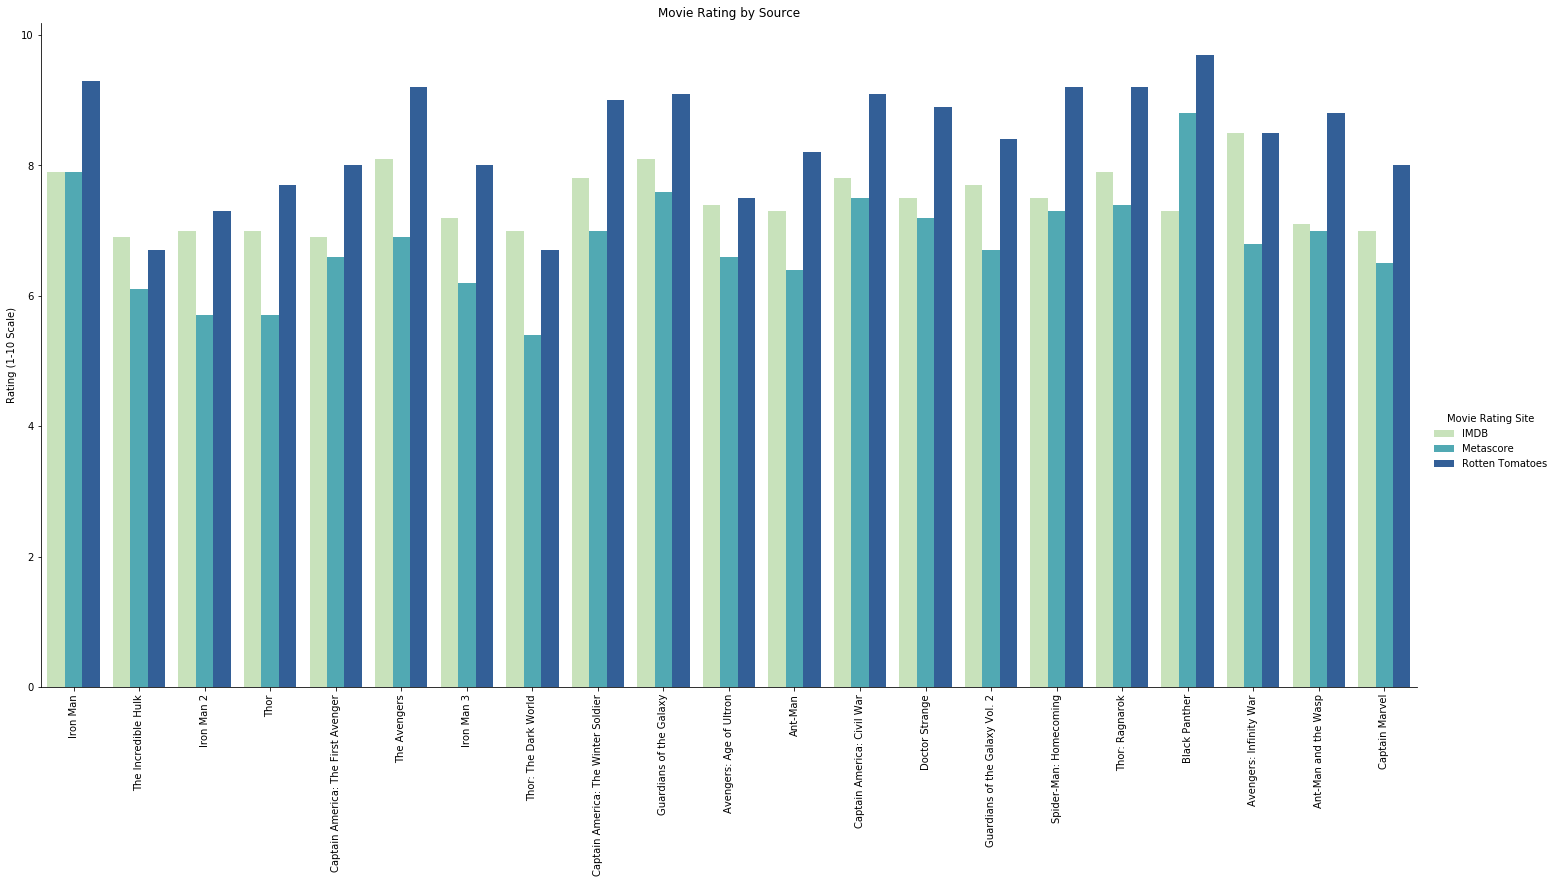

In [8]:
# Plot melted table as boxplots by Customer type
Ratings_Plot = sns.catplot(y="Rating", x="Movie", hue="Source", kind="bar",
            palette="YlGnBu", data=Marvel_Ratings_Melted, height=10, aspect=2)

# Access the legend created by Seaborn via Seaborn call
legend = Ratings_Plot._legend

# The legend can then be manipulated as follows:
legend.set_title("Movie Rating Site")
for t, l in zip(legend.texts,("IMDB", "Metascore", "Rotten Tomatoes")):
    t.set_text(l)

# Now set title and label names (y-axis is blank with "")
plt.ylabel("Rating (1-10 Scale)")
plt.xlabel("")
plt.xticks(rotation=90)
plt.title("Movie Rating by Source")

Ratings_Plot.savefig('Ratings_Plot.png', dpi=400)

In [11]:
# Calculate average movie rating
Marvel_Ratings['Mean'] = Marvel_Ratings.iloc[:, 1:].mean(axis=1).round(1)
Marvel_Ratings

,Movie,IMDB,Metascore,Rotten Tomatoes,Mean
0,Iron Man,7.9,7.9,9.3,8.4
1,The Incredible Hulk,6.9,6.1,6.7,6.6
2,Iron Man 2,7.0,5.7,7.3,6.7
3,Thor,7.0,5.7,7.7,6.8
4,Captain America: The First Avenger,6.9,6.6,8.0,7.2
5,The Avengers,8.1,6.9,9.2,8.1
6,Iron Man 3,7.2,6.2,8.0,7.1
7,Thor: The Dark World,7.0,5.4,6.7,6.4
8,Captain America: The Winter Soldier,7.8,7.0,9.0,7.9
9,Guardians of the Galaxy,8.1,7.6,9.1,8.3


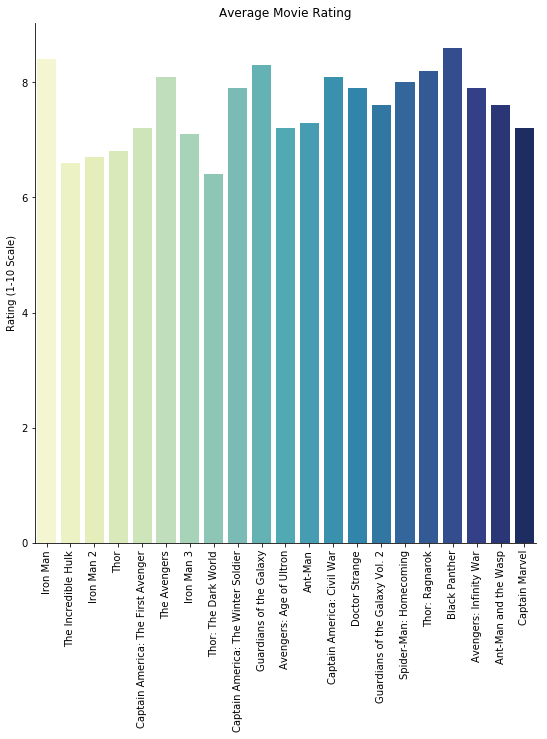

In [12]:
# Plot melted table as boxplots by Customer type
Ratings_Plot2 = sns.catplot(y="Mean", x="Movie", kind="bar",
            palette="YlGnBu", data=Marvel_Ratings, height=8, aspect=1)

# Now set title and label names (y-axis is blank with "")
plt.ylabel("Rating (1-10 Scale)")
plt.xlabel("")
plt.xticks(rotation=90)
plt.title("Average Movie Rating")

Ratings_Plot2.savefig('Ratings_Plot2.png', dpi=400)

In [13]:
# Prepare revised data frame for plotting and regressions
cust_columns_to_choose = list(range(1,3))
cust_columns_to_choose += list(range(8,11))
Marvel2 = Marvel.iloc[:, cust_columns_to_choose]
Marvel2 = Marvel2.dropna()
Marvel2.columns = ['Movie', 'Release Date', 'Movie Budget', 'US Box Office', 'Worldwide Box Office']

# Make copy for plotting use, however, model the regression analysis with Marvel2
Marvel_TimeSeries = Marvel2
Marvel2

,Movie,Release Date,Movie Budget,US Box Office,Worldwide Box Office
0,Iron Man,5/2/2008,186000000.0,318604126.0,5.851715e+08
1,The Incredible Hulk,6/13/2008,137500000.0,134806913.0,2.655739e+08
2,Iron Man 2,5/7/2010,170000000.0,312433331.0,6.211564e+08
3,Thor,5/6/2011,150000000.0,181030624.0,4.493266e+08
4,Captain America: The First Avenger,7/22/2011,140000000.0,176654505.0,3.705698e+08
5,The Avengers,4/11/2012,225000000.0,623279547.0,1.517936e+09
6,Iron Man 3,5/3/2013,200000000.0,408992272.0,1.215392e+09
7,Thor: The Dark World,11/8/2013,150000000.0,206362140.0,6.446025e+08
8,Captain America: The Winter Soldier,4/4/2014,170000000.0,259746958.0,7.144019e+08
9,Guardians of the Galaxy,8/1/2014,170000000.0,333172112.0,7.708675e+08


In [14]:
# Melt dataframe
Marvel_Time_Melted = Marvel_TimeSeries.melt(id_vars=['Movie', 'Release Date'])

# Check data type by column
# Marvel_Time_Melted.dtypes

# If needed, convert floats to integers
# Marvel_Time_Melted.value = Marvel_Time_Melted.value.astype(float)

# Update column names
Marvel_Time_Melted.columns = ['Movie', 'Release Date', 'Variable', 'Value']

# Create new columns parsing the Release Date string
Marvel_Time_Melted[['Month', 'Day', 'Year']] = Marvel_Time_Melted['Release Date'].str.split('/', expand=True)

# Convert Month and Year fields to num (Month divided by 13 to later add to Year)
Marvel_Time_Melted['Month'] = Marvel_Time_Melted.Month.astype(int)/13
Marvel_Time_Melted['Year'] = Marvel_Time_Melted.Year.astype(int)

# Create new Date field with format in Year.Month
Marvel_Time_Melted['Date'] = (Marvel_Time_Melted['Year'] + Marvel_Time_Melted['Month']).round(2)

# Delete Month, Day, Year fields
Marvel_Time_Melted = Marvel_Time_Melted.drop(['Month', 'Day', 'Year'], axis=1)

# Print table
Marvel_Time_Melted.head()

,Movie,Release Date,Variable,Value,Date
0,Iron Man,5/2/2008,Movie Budget,186000000.0,2008.38
1,The Incredible Hulk,6/13/2008,Movie Budget,137500000.0,2008.46
2,Iron Man 2,5/7/2010,Movie Budget,170000000.0,2010.38
3,Thor,5/6/2011,Movie Budget,150000000.0,2011.38
4,Captain America: The First Avenger,7/22/2011,Movie Budget,140000000.0,2011.54


In [15]:
# Check data types
Marvel_Time_Melted.dtypes

Movie            object
Release Date     object
Variable         object
Value           float64
Date            float64
dtype: object

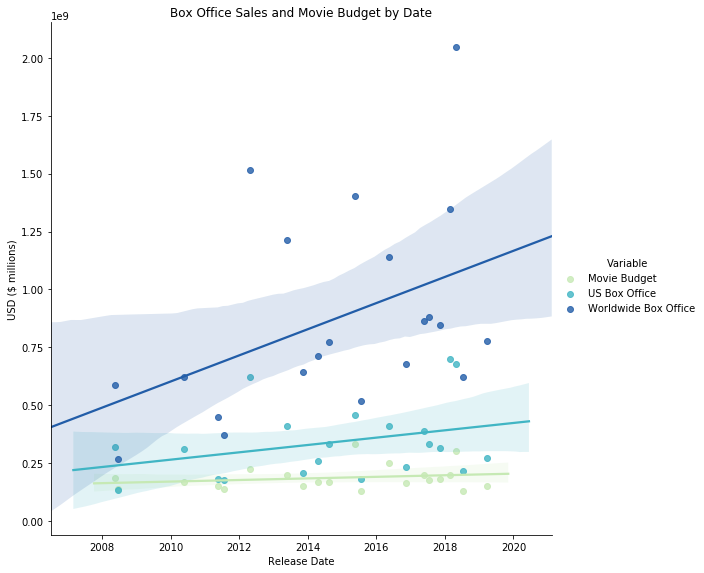

In [18]:
Marvel_lm_Plot = sns.lmplot(data=Marvel_Time_Melted, x = 'Date', y = 'Value',
           hue='Variable', palette="YlGnBu", fit_reg=True, ci=95, height=8, aspect=1)

# Now set title and label names (y-axis is blank with "")
plt.ylabel("USD ($ millions)")
plt.xlabel("Release Date")
plt.title("Box Office Sales and Movie Budget by Date")

Marvel_lm_Plot.savefig('Marvel_lm_Plot.png', dpi=400)

C:\Program Files\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


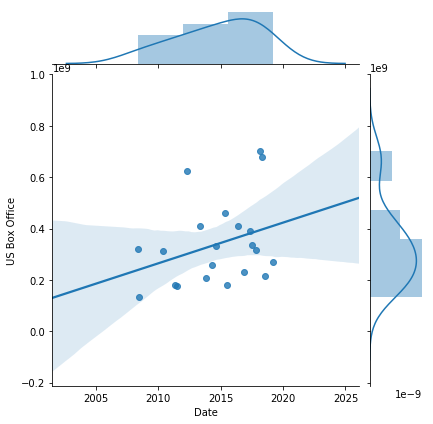

In [16]:
# Create new columns parsing the Release Date string
Marvel_DateAsInt = Marvel_TimeSeries
Marvel_DateAsInt[['Month', 'Day', 'Year']] = Marvel_DateAsInt['Release Date'].str.split('/', expand=True)

# Convert Month and Year fields to num (Month divided by 13 to later add to Year)
Marvel_DateAsInt['Month'] = Marvel_DateAsInt.Month.astype(int)/13
Marvel_DateAsInt['Year'] = Marvel_DateAsInt.Year.astype(int)

# Create new Date field with format in Year.Month
Marvel_DateAsInt['Date'] = (Marvel_DateAsInt['Year'] + Marvel_DateAsInt['Month']).round(2)

# Delete Month, Day, Year fields
Marvel_DateAsInt = Marvel_DateAsInt.drop(['Month', 'Day', 'Year'], axis=1)

# Make jointplot to show distribution of axes and regression in one plot
Marvel_lm_Plot2 = sns.jointplot(x='Date', y='US Box Office', data=Marvel_DateAsInt,
                                kind='reg')

# Save image
Marvel_lm_Plot2.savefig('Marvel_lm_Plot2.png', dpi=400)

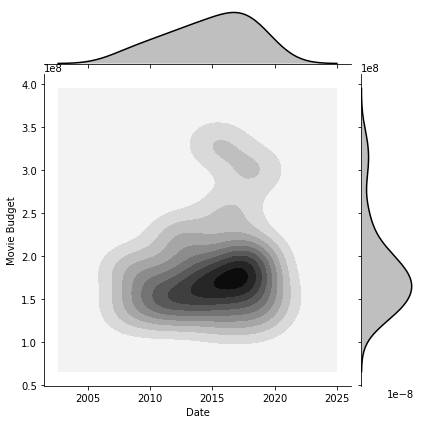

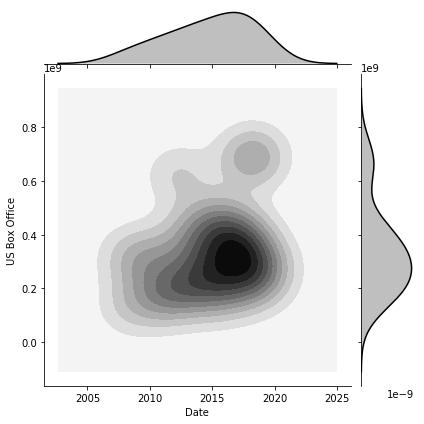

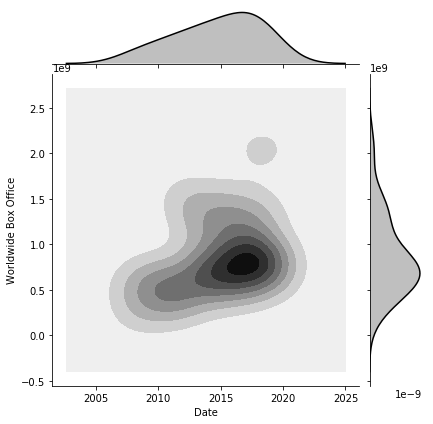

In [17]:
# Make jointplot to show distribution of axes and regression in one plot
Marvel_lm_Plot3 = sns.jointplot(x='Date', y='Movie Budget', data=Marvel_DateAsInt,
                                color='black', kind='kde')

Marvel_lm_Plot4 = sns.jointplot(x='Date', y='US Box Office', data=Marvel_DateAsInt,
                                color='black', kind='kde')

Marvel_lm_Plot5 = sns.jointplot(x='Date', y='Worldwide Box Office', data=Marvel_DateAsInt,
                                color='black', kind='kde')

# Save images
Marvel_lm_Plot3.savefig('Marvel_lm_Plot3.png', dpi=400)
Marvel_lm_Plot4.savefig('Marvel_lm_Plot4.png', dpi=400)
Marvel_lm_Plot5.savefig('Marvel_lm_Plot5.png', dpi=400)